https://scikit-learn.org/stable/modules/biclustering.html

https://scikit-learn.org/stable/auto_examples/bicluster/plot_spectral_coclustering.html#sphx-glr-auto-examples-bicluster-plot-spectral-coclustering-py

In [1]:
import numpy as np

In [2]:
!pip install sklearn


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from matplotlib import pyplot as plt

In [5]:
from sklearn.datasets import make_biclusters

In [6]:
from sklearn.cluster import SpectralCoclustering

In [7]:
from sklearn.metrics import consensus_score

In [8]:
data, rows, columns = make_biclusters(
    shape = (300, 300),
    n_clusters=5,
    noise=5,
    shuffle=False,
    random_state=0,
    )

Text(0.5, 1.0, 'original data')

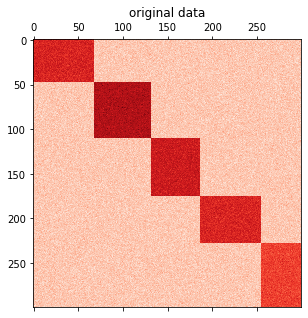

In [9]:
plt.matshow(
    data,
    cmap = plt.cm.Reds,
    )
plt.title('original data')

In [10]:
rng = np.random.RandomState(0)

In [11]:
row_idx = rng.permutation(data.shape[0])

In [12]:
col_idx = rng.permutation(data.shape[1])

In [13]:
data = data[row_idx][:,col_idx]

Text(0.5, 1.0, 'shuffled data')

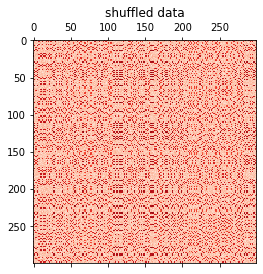

In [14]:
plt.matshow(
    data,
    cmap = plt.cm.Reds,
    )
plt.title('shuffled data')

In [15]:
model = SpectralCoclustering(
    n_clusters=5,
    random_state=0,
    )

In [16]:
model.fit(data)

SpectralCoclustering(n_clusters=5, random_state=0)

In [17]:
biclusters = model.biclusters_

In [18]:
biclusters[0].shape

(5, 300)

In [19]:
biclusters[1].shape

(5, 300)

In [20]:
score = consensus_score(
    model.biclusters_,
    (
        rows[:,row_idx],
        columns[:,col_idx]
    )
    )

In [21]:
print(score)

1.0


In [23]:
model.row_labels_.shape

(300,)

In [24]:
model.column_labels_.shape

(300,)

In [25]:
new_row_index = np.argsort(model.row_labels_)

In [29]:
new_column_index = np.argsort(model.column_labels_)

In [30]:
new_data = data[new_row_index][:,new_column_index]

Text(0.5, 1.0, 'after biclustering data')

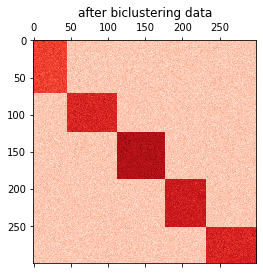

In [31]:
plt.matshow(
    new_data,
    cmap = plt.cm.Reds,
    )
plt.title('after biclustering data')